# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

All correct


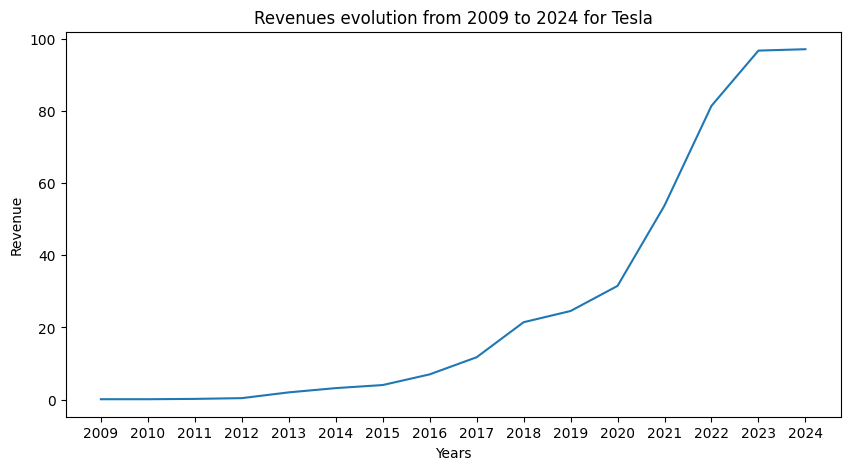

In [68]:
import os
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re

#Paso 2
url = "https://companies-market-cap-copy.vercel.app/index.html"
response = requests.get(url)
if response.status_code == 200:
    print("All correct")
else:
    print("Error")
html_contenido = response.text


#Paso 3
soup = BeautifulSoup(html_contenido, "html.parser")
table = soup.find("table")
data = table.find_all("tr")

final_data = []
for i in data[1:]:
    columns = i.find_all("td")
    year = columns[0].text.strip()
    revenue = columns[1].text.strip()
    final_data.append([year, revenue])
final_data

df = pd.DataFrame(final_data, columns=["Year", "Revenue"])
df = df.sort_values(["Year"], ascending=True)
df["Revenue"] = df["Revenue"].replace({"\$":"", "B":""}, regex=True)
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df

#Step 6

X = df["Year"]
Y = df["Revenue"]
plt.figure(figsize=(10, 5))
plt.plot(X, Y)
plt.title("Revenues evolution from 2009 to 2024 for Tesla")
plt.xlabel("Years")
plt.ylabel("Revenue")
plt.show()


